<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Add-KHK-Abundance-and-cumulative-sums." data-toc-modified-id="Add-KHK-Abundance-and-cumulative-sums.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Add KHK Abundance and cumulative sums.</a></span></li><li><span><a href="#load-Measured-Protein-Mass-%-for-induced-vs-uninduced-KHK-collection" data-toc-modified-id="load-Measured-Protein-Mass-%-for-induced-vs-uninduced-KHK-collection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>load Measured Protein Mass % for induced vs uninduced KHK collection</a></span></li><li><span><a href="#Append-protein-mass-%-for-KHK-induced-vs-uninduced" data-toc-modified-id="Append-protein-mass-%-for-KHK-induced-vs-uninduced-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Append protein mass % for KHK induced vs uninduced</a></span></li><li><span><a href="#Max-gene-in-each-MaxMass-solution" data-toc-modified-id="Max-gene-in-each-MaxMass-solution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Max gene in each MaxMass solution</a></span></li></ul></div>

# Add KHK Abundance and cumulative sums.

In [1]:
import os, pandas as pd
def cumsum_k_minus_1( abundance ):
    idx = abundance.index
    
    cumsum_k_minus_1_df = pd.concat([pd.Series(0),
                                      np.cumsum(abundance)],
                                    ignore_index=True).iloc[:-1]
    cumsum_k_minus_1_df.index = idx
    return cumsum_k_minus_1_df

def flatten_dfs(dataframes, keys, names, flatten=True ):
    all_data = pd.concat([dataframes[key]
                       for key in keys],
                   axis=1,
          keys=keys,
          names=names )
    if flatten:
        flat_headers = ['{}_{}'.format(key,column) 
                    for key, column in
                        zip(all_data.columns.get_level_values( names[0] ),
                            all_data.columns.get_level_values( names[1] ) )]

        all_data.columns= flat_headers
    return all_data


# load Measured Protein Mass % for induced vs uninduced KHK collection

In [2]:
import os
prot_pct = pd.read_csv(os.path.join(os.environ['HOME'],'Projects/src',
                             'MaxMass/src/data/Ecoli/E.coli_avg_iBAQ_mass_pct_induced_v_uninduced.tab'),
                      sep='\t',
                      index_col='Blattner',
                      na_values='NIL')
prot_pct = prot_pct.loc[~prot_pct.index.duplicated()]

In [3]:
prot_pct['W3110_cumate'].sum()

95.097297126175448

In [24]:
len('_genomemax.tab')
#genome_max_files[0][:-14]

14

In [4]:
genome_max_files = [f for f in os.listdir('out') if 'genomemax' in f]
conditions = [condition[:-len('_genomemax.tab')] 
              for condition in genome_max_files]

genome_max = {}
for condition in conditions:
    genome_max[condition] = pd.read_csv( os.path.join('out', condition + '_genomemax.tab'), 
                                         index_col='$gene_or_promoter',
                                         sep='\t' )
flat_genome_max = flatten_dfs( genome_max, conditions, ['condition', 'columns'], flatten=False)
flat_genome_max

/Users/zuck016/.pyenv/versions/anaconda2-5.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



condition MGF-01_control                                                  \
columns    SolutionOrder class mass reclaimed $(fg/cell)$ MGF-01_control   
b0014                NaN   NaN                        NaN            NaN   
b0033                NaN   NaN                        NaN            NaN   
b0436                3.0  gene                   0.011471       0.009012   
b0605                NaN   NaN                        NaN            NaN   
b0957                9.0  gene                   0.017780       0.017371   
b1241                5.0  gene                   0.012159       0.005293   
b1243                NaN   NaN                        NaN            NaN   
b1493                7.0  gene                   0.015388       0.011466   
b1580                6.0  gene                   0.014900       0.008178   
b1581                NaN   NaN                        NaN            NaN   
b1676                NaN   NaN                        NaN            NaN   
b2000                NaN   NaN                        NaN            NaN   
b2185                NaN   NaN                        NaN            NaN   
b2296                NaN   NaN                        NaN            NaN   
b2414                8.0  gene                   0.016935       0.016928   
b2465                2.0  gene                   0.007345       0.005059   
b2903                NaN   NaN                        NaN            NaN   
b3339               11.0  gene                   0.047992       0.047971   
b3870                NaN   NaN                        NaN            NaN   
b3871                NaN   NaN                        NaN            NaN   
b3984                1.0  gene                   0.007058       0.004666   
b4015                4.0  gene                   0.011873       0.008990   
b4382                NaN   NaN                        NaN            NaN   
b4384               10.0  gene                   0.020646       0.005907   

condition                                     MGF-01_cumate        \
columns   MGF-01_control_cumulative_abundance SolutionOrder class   
b0014                                     NaN           3.0  gene   
b0033                                     NaN           NaN   NaN   
b0436                                0.083896           4.0  gene   
b0605                                     NaN           8.0  gene   
b0957                                0.168126          10.0  gene   
b1241                                0.220846           NaN   NaN   
b1243                                     NaN           5.0  gene   
b1493                                0.248772           NaN   NaN   
b1580                                0.261906           7.0  gene   
b1581                                     NaN           NaN   NaN   
b1676                                     NaN           1.0  gene   
b2000                                     NaN           NaN   NaN   
b2185                                     NaN           NaN   NaN   
b2296                                     NaN           NaN   NaN   
b2414                                0.374243           6.0  gene   
b2465                                0.398240           NaN   NaN   
b2903                                     NaN           NaN   NaN   
b3339                                0.694267          11.0  gene   
b3870                                     NaN           NaN   NaN   
b3871                                     NaN           NaN   NaN   
b3984                                0.872597           NaN   NaN   
b4015                                0.913857           2.0  gene   
b4382                                     NaN           NaN   NaN   
b4384                                0.991146           9.0  gene   

condition                                           \
columns   mass reclaimed $(fg/cell)$ MGF-01_cumate   
b0014                       0.010412      0.009783   
b0033                            NaN           NaN   
b0436       

# Append protein mass % for KHK induced vs uninduced

In [5]:
abundance = pd.read_table('data/Ecoli/A14.07036_cumulative_mass.tab', index_col='gene_or_promoter')
ibaqs = prot_pct.columns[1:]
abundance

/Users/zuck016/.pyenv/versions/anaconda2-5.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  if __name__ == '__main__':


,start,end,strand,class,genes_in_TU,start_if_select_as_start,cannot_as_start,Uniprot,Description,Gene,Cellular protein location (according to www.uniprot.org),A14.07036,A14.07037,A14.07038,cumulativeMass
gene_or_promoter,,,,,,,,,,,,,,,
PM00249,148,189,1,promoter,"[b0001, b0002, b0003, b0004]",148,0,NaN,NaN,NaN,NaN,4.591656e-07,NaN,NaN,0.000000e+00
b0001,190,255,1,gene,NaN,190,0,P0AD86,NaN,NaN,NaN,4.591656e-07,NaN,NaN,4.591656e-07
b0002,337,2799,1,gene,NaN,337,0,P00561,NaN,NaN,NaN,4.591656e-07,NaN,NaN,9.183312e-07
b0003,2801,3733,1,gene,NaN,2801,0,P00547,Homoserine kinase OS=Escherichia coli (strain ...,thrB,Cytoplasm,3.313051e-02,0.032556,0.033302,1.377497e-06
b0004,3734,5020,1,gene,NaN,3734,0,P00934,NaN,NaN,NaN,4.591656e-07,NaN,NaN,3.313188e-02
b0005,5234,5530,1,gene,NaN,5234,0,P75616,NaN,NaN,NaN,4.591656e-07,NaN,NaN,3.313234e-02
b0006,5683,6459,-1,gene,NaN,5683,0,P0A8I3,NaN,NaN,NaN,4.591656e-07,NaN,NaN,3.313280e-02
b0007,6529,7959,-1,gene,NaN,6529,0,P30143,NaN,NaN,NaN,4.591656e-07,NaN,NaN,3.313326e-02
PM0-9956,8191,8237,1,promoter,[b0008],8191,0,NaN,NaN,NaN,NaN,4.591656e-07,NaN,NaN,3.313372e-02


In [6]:
for ibaq in ibaqs:
    abundance[ibaq] = prot_pct[ibaq]

    abundance[ibaq] = abundance[ibaq].fillna(-abundance[ibaq].min())
    display(abundance[ibaq].to_frame())
    abundance[ibaq] = abundance[ibaq]/abundance[ibaq].sum()
    abundance['{}_cumulative_abundance'.format(ibaq)] = cumsum_k_minus_1( abundance[ibaq] )
abundance

,W3110_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.022608
b0003,0.005293
b0004,0.019824
b0005,-0.000000
b0006,0.036888
b0007,-0.000000
PM0-9956,-0.000000


,W3110_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.023002
b0003,0.004898
b0004,0.022490
b0005,-0.000000
b0006,0.018140
b0007,-0.000000
PM0-9956,-0.000000


,Step_06_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.042017
b0003,0.009894
b0004,0.033282
b0005,-0.000000
b0006,0.035805
b0007,-0.000000
PM0-9956,-0.000000


,Step_06_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.046296
b0003,0.009258
b0004,0.044065
b0005,-0.000000
b0006,0.021491
b0007,-0.000000
PM0-9956,-0.000000


,Step_07_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.042547
b0003,0.009463
b0004,0.032779
b0005,-0.000000
b0006,0.033922
b0007,-0.000000
PM0-9956,-0.000000


,Step_07_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.044939
b0003,0.008797
b0004,0.042840
b0005,-0.000000
b0006,0.026676
b0007,-0.000000
PM0-9956,-0.000000


,Step_11_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.072491
b0003,0.020452
b0004,0.054536
b0005,-0.000000
b0006,0.020715
b0007,-0.000000
PM0-9956,-0.000000


,Step_11_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.061134
b0003,0.010347
b0004,0.053573
b0005,-0.000000
b0006,0.006389
b0007,-0.000000
PM0-9956,-0.000000


,Step_12_lowOD_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.057587
b0003,0.008966
b0004,0.057179
b0005,-0.000000
b0006,0.034649
b0007,-0.000000
PM0-9956,-0.000000


,Step_12_lowOD_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.053209
b0003,0.008211
b0004,0.046002
b0005,-0.000000
b0006,0.005352
b0007,-0.000000
PM0-9956,-0.000000


,Step_15_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.075111
b0003,0.018561
b0004,0.062911
b0005,-0.000000
b0006,0.048424
b0007,-0.000000
PM0-9956,-0.000000


,Step_15_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.042737
b0003,0.007940
b0004,0.043704
b0005,-0.000000
b0006,0.030417
b0007,-0.000000
PM0-9956,-0.000000


,Step_16_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.074870
b0003,0.017786
b0004,0.065654
b0005,-0.000000
b0006,0.026232
b0007,-0.000000
PM0-9956,-0.000000


,Step_16_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.043208
b0003,0.007086
b0004,0.041417
b0005,-0.000000
b0006,0.025158
b0007,-0.000000
PM0-9956,-0.000000


,MGF-01_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.049723
b0003,0.009685
b0004,0.040577
b0005,-0.000000
b0006,0.026271
b0007,-0.000000
PM0-9956,-0.000000


,MGF-01_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.036057
b0003,0.009674
b0004,0.033779
b0005,-0.000000
b0006,0.033220
b0007,-0.000000
PM0-9956,-0.000000


,MGF-02_control
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.090520
b0003,0.019079
b0004,0.076014
b0005,-0.000000
b0006,0.003423
b0007,-0.000000
PM0-9956,-0.000000


,MGF-02_cumate
gene_or_promoter,
PM00249,-0.000000
b0001,-0.000000
b0002,0.047820
b0003,0.007014
b0004,0.044878
b0005,-0.000000
b0006,0.004064
b0007,-0.000000
PM0-9956,-0.000000


,start,end,strand,class,genes_in_TU,start_if_select_as_start,cannot_as_start,Uniprot,Description,Gene,...,Step_16_cumate,Step_16_cumate_cumulative_abundance,MGF-01_control,MGF-01_control_cumulative_abundance,MGF-01_cumate,MGF-01_cumate_cumulative_abundance,MGF-02_control,MGF-02_control_cumulative_abundance,MGF-02_cumate,MGF-02_cumate_cumulative_abundance
gene_or_promoter,,,,,,,,,,,,,,,,,,,,,
PM00249,148,189,1,promoter,"[b0001, b0002, b0003, b0004]",148,0,NaN,NaN,NaN,...,-0.000000e+00,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
b0001,190,255,1,gene,NaN,190,0,P0AD86,NaN,NaN,...,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
b0002,337,2799,1,gene,NaN,337,0,P00561,NaN,NaN,...,4.588350e-04,-0.000000,0.000513,-0.000000,0.000386,-0.000000,0.000940,-0.000000,0.000505,-0.000000
b0003,2801,3733,1,gene,NaN,2801,0,P00547,Homoserine kinase OS=Escherichia coli (strain ...,thrB,...,7.524927e-05,0.000459,0.000100,0.000513,0.000104,0.000386,0.000198,0.000940,0.000074,0.000505
b0004,3734,5020,1,gene,NaN,3734,0,P00934,NaN,NaN,...,4.398179e-04,0.000534,0.000419,0.000613,0.000362,0.000489,0.000790,0.001138,0.000474,0.000579
b0005,5234,5530,1,gene,NaN,5234,0,P75616,NaN,NaN,...,-0.000000e+00,0.000974,-0.000000,0.001032,-0.000000,0.000851,-0.000000,0.001928,-0.000000,0.001052
b0006,5683,6459,-1,gene,NaN,5683,0,P0A8I3,NaN,NaN,...,2.671573e-04,0.000974,0.000271,0.001032,0.000356,0.000851,0.000036,0.001928,0.000043,0.001052
b0007,6529,7959,-1,gene,NaN,6529,0,P30143,NaN,NaN,...,-0.000000e+00,0.001241,-0.000000,0.001303,-0.000000,0.001207,-0.000000,0.001964,-0.000000,0.001095
PM0-9956,8191,8237,1,promoter,[b0008],8191,0,NaN,NaN,NaN,...,-0.000000e+00,0.001241,-0.000000,0.001303,-0.000000,0.001207,-0.000000,0.001964,-0.000000,0.001095


In [7]:
abundance.to_csv(os.path.join(os.environ['HOME'],
                                                          'Projects/src/MaxMass/src',                    
                                                            'data/Ecoli/KHK_induced_vs_uninduced_cumulative_mass.tab'),
                                            sep='\t', index_label='gene_or_promoter')
abundance

,start,end,strand,class,genes_in_TU,start_if_select_as_start,cannot_as_start,Uniprot,Description,Gene,...,Step_16_cumate,Step_16_cumate_cumulative_abundance,MGF-01_control,MGF-01_control_cumulative_abundance,MGF-01_cumate,MGF-01_cumate_cumulative_abundance,MGF-02_control,MGF-02_control_cumulative_abundance,MGF-02_cumate,MGF-02_cumate_cumulative_abundance
gene_or_promoter,,,,,,,,,,,,,,,,,,,,,
PM00249,148,189,1,promoter,"[b0001, b0002, b0003, b0004]",148,0,NaN,NaN,NaN,...,-0.000000e+00,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
b0001,190,255,1,gene,NaN,190,0,P0AD86,NaN,NaN,...,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
b0002,337,2799,1,gene,NaN,337,0,P00561,NaN,NaN,...,4.588350e-04,-0.000000,0.000513,-0.000000,0.000386,-0.000000,0.000940,-0.000000,0.000505,-0.000000
b0003,2801,3733,1,gene,NaN,2801,0,P00547,Homoserine kinase OS=Escherichia coli (strain ...,thrB,...,7.524927e-05,0.000459,0.000100,0.000513,0.000104,0.000386,0.000198,0.000940,0.000074,0.000505
b0004,3734,5020,1,gene,NaN,3734,0,P00934,NaN,NaN,...,4.398179e-04,0.000534,0.000419,0.000613,0.000362,0.000489,0.000790,0.001138,0.000474,0.000579
b0005,5234,5530,1,gene,NaN,5234,0,P75616,NaN,NaN,...,-0.000000e+00,0.000974,-0.000000,0.001032,-0.000000,0.000851,-0.000000,0.001928,-0.000000,0.001052
b0006,5683,6459,-1,gene,NaN,5683,0,P0A8I3,NaN,NaN,...,2.671573e-04,0.000974,0.000271,0.001032,0.000356,0.000851,0.000036,0.001928,0.000043,0.001052
b0007,6529,7959,-1,gene,NaN,6529,0,P30143,NaN,NaN,...,-0.000000e+00,0.001241,-0.000000,0.001303,-0.000000,0.001207,-0.000000,0.001964,-0.000000,0.001095
PM0-9956,8191,8237,1,promoter,[b0008],8191,0,NaN,NaN,NaN,...,-0.000000e+00,0.001241,-0.000000,0.001303,-0.000000,0.001207,-0.000000,0.001964,-0.000000,0.001095


In [8]:
%%bash
/Users/zuck016/.pyenv/versions/anaconda2-5.2.0/bin/python max_mass.py --help

Usage: max_mass.py [OPTIONS]

Options:
  --project_name TEXT       Project name
  --output_solution TEXT    output file
  --output_genomeview TEXT  genomeview output file
  --genomeview_only TEXT    Run MaxMass or just parse results
  --gsm_f TEXT              Genome scale model
  --data_d TEXT
  --essentialgene_f TEXT    Name of file containing essential genes
  --parameters_f TEXT
  --sequence_f TEXT         Name of sequence file
  --reg_f TEXT              Name of file containing gene regulators that
                            should not be removed
  --tu_f TEXT               Json file containing gene promoter dictionary
  --lp_f TEXT               Lp file
  --abundance_f TEXT        Name of cumulative mass file
  --abundance_col TEXT      Column containing mass abundance
  --cumulative_col TEXT     Column containing cumulative mass
  --offrxn_f TEXT           add bound to constrain the flux of these reactions
                            to be zero
  --alt_org_f TEXT          alter

In [16]:
' '.join(ibaqs)

'W3110_control W3110_cumate Step_06_control Step_06_cumate Step_07_control Step_07_cumate Step_11_control Step_11_cumate Step_12_lowOD_control Step_12_lowOD_cumate Step_15_control Step_15_cumate Step_16_control Step_16_cumate MGF-01_control MGF-01_cumate MGF-02_control MGF-02_cumate'

'W3110_control W3110_cumate Step_06_control Step_06_cumate Step_07_control Step_07_cumate Step_11_control Step_11_cumate Step_12_lowOD_control Step_12_lowOD_cumate Step_15_control Step_15_cumate Step_16_control Step_16_cumate MGF-01_control MGF-01_cumate MGF-02_control MGF-02_cumate'

In [9]:
%%bash
for ibaq in W3110_control W3110_cumate Step_06_control Step_06_cumate Step_07_control Step_07_cumate Step_11_control Step_11_cumate Step_12_lowOD_control Step_12_lowOD_cumate Step_15_control Step_15_cumate Step_16_control Step_16_cumate MGF-01_control MGF-01_cumate MGF-02_control MGF-02_cumate
do
    /Users/zuck016/.pyenv/versions/anaconda2-5.2.0/bin/python max_mass.py \
  --output_solution="./out/${ibaq}.csv" \
  --objective 
  --output_genomeview="./out/${ibaq}_genomeview.tab" \
  --abundance_f="KHK_induced_vs_uninduced_cumulative_mass.tab" \
  --abundance_col="$ibaq" \
  --cumulative_col="${ibaq}_cumulative_abundance" \
  --num_solutions=15 &
done

Process is interrupted.


# Max gene in each MaxMass solution

In [49]:
genome_view = {}
genome_max = {}
for ibaq in ibaqs:
    genome_view[ibaq] = pd.read_csv('./out/{}_genomeview.tab'.format(ibaq),
                                   sep='\t',index_col='$gene_or_promoter')
    idxmax = genome_view[ibaq].groupby('SolutionOrder').idxmax()[ibaq].values
    genome_max[ibaq] = genome_view[ibaq].loc[idxmax]
    genome_max[ibaq].to_csv('./out/{}_genomemax.tab'.format(ibaq),sep='\t')

In [44]:
genome_max2 = genome_max['W3110_control'].copy()

In [50]:
genome_max2[r'mass % of largest gene in KO'] = genome_max2['W3110_control']*100
genome_max2[r'total mass % reclaimed in KO'] = genome_max2['mass reclaimed $(fg/cell)$']*100

In [13]:
!/Users/zuck016/.pyenv/versions/anaconda2-5.2.0/bin/pip install plotnine

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
    100% |████████████████████████████████| 3.6MB 877kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/52/01/8a3b4c6e45749674a1e5241174b4b63cd6435125e124bec275f3e02c96ac/mizani-0.4.6-py2.py3-none-any.whl
    100% |████████████████████████████████| 27.4MB 680kB/s ta 0:00:01
    100% |████████████████████████████████| 931kB 1.6MB/s ta 0:00:011
    100% |████████████████████████████████| 1.6MB 1.7MB/s ta 0:00:01
    100% |████████████████████████████████| 24.4MB 735kB/s ta 0:00:011
    100% |████████████████████████████████| 11.3MB 1.3MB/s ta 0:00:011
  Stored in directory: /Users/zuck016/Library/Caches/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
cobrame 0.0.9 has requirement cobra<=0.5.11, but you'll have 

In [27]:
[idx for idx in reversed(genome_max['W3110_control'].index)]

['b3339',
 'b0957',
 'b2414',
 'b0436',
 'b1241',
 'b1676',
 'b3984',
 'b2465',
 'b2903',
 'b3871',
 'b2296',
 'b2185',
 'b0605',
 'b0033',
 'b1849',
 'b0014',
 'b2000',
 'b1493',
 'b2579']

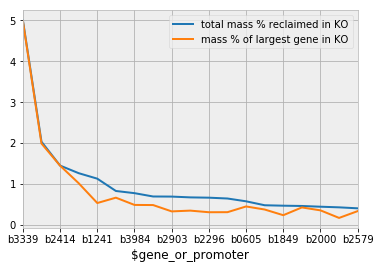

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotnine as p9
dir(p9)
ridx = [idx for idx in reversed(genome_max2.index)]
from plotnine import (aes, ggplot, geom_line, geom_point)

genome_max2.loc[ridx,[r'total mass % reclaimed in KO',
       r'mass % of largest gene in KO']].plot()
plt.savefig('total_and_max_gene_mass_reclaimed_per_KO.pdf')

In [53]:
genome_max2.to_csv('out/W3110_control_genomemax_20.tab', sep='\t')

# 